# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np
import cv2

In [4]:
n_train = y_train.shape[0]
n_test = y_test.shape[0]
image_shape = X_train.shape[1:3]
u, indices = np.unique(y_train, return_index=True)
n_classes = len(u)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


In [6]:
import csv

# parse the signal names list and store for later
with open('signnames.csv') as inputfile:
    reader = csv.reader(inputfile, delimiter=',')
    list_of_labels={}
    for row in reader:
        list_of_labels[row[0]] = row[1]

u, indices, u_counts = np.unique(y_train, return_index=True, return_counts=True)
print("Number of u =", u)
print("Number of indices =", indices)
print("Number of u_counts =", u_counts)
        
def label_for(num_label):
    return list_of_labels[str(num_label)]

def draw_graph(features, labels):
    displayed = []
    index = 0
    plot_num = 1

    plt.figure(figsize=(15, 10))
    for item in labels:
        if item not in displayed:
            plt.subplot(8, 6, plot_num)
            plt.imshow(features[index], cmap='gray')
            plt.title(label_for(labels[index]), fontsize=8)
            plt.axis('off')
            displayed.append(item)
            plot_num += 1
        index += 1
    plt.show()

        


Number of u = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Number of indices = [ 9960  2220 31439  5370  6810 12360 21450 23730 15870 11040 17130  8580
 27329 21810 29219 29909  5010 30449 20370  6630 25950 25680  4500  1770
 10800 33449  1230 10350 26849 10560 25020   210 10140 26250 20010 18930
   900  4830 14010 25410  4200     0  9750]
Number of u_counts = [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]


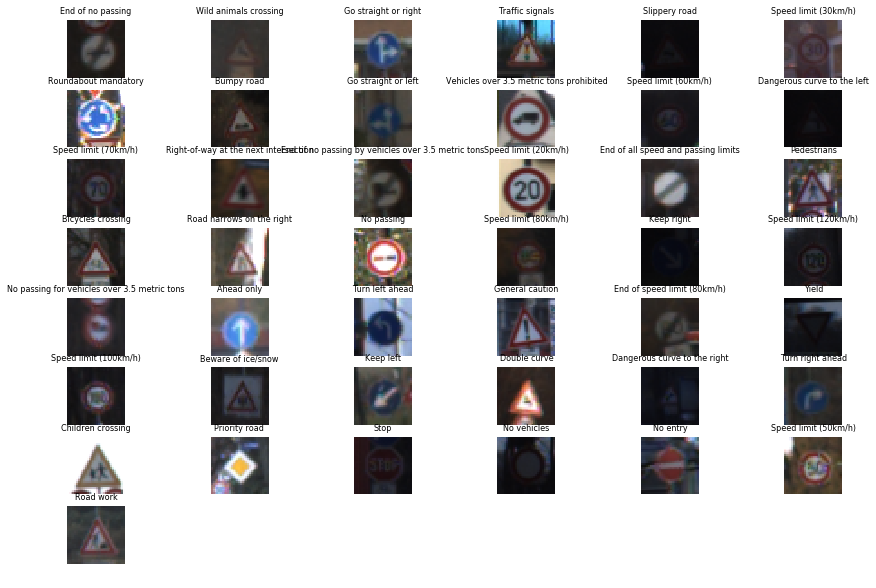

In [7]:

        
text_labels = np.ndarray(len(train['labels']), dtype=object)
for i in range(0, len(train['labels'])):
    text_labels[i] = list_of_labels[str(train['labels'][i])]

draw_graph(train['features'], train['labels'])


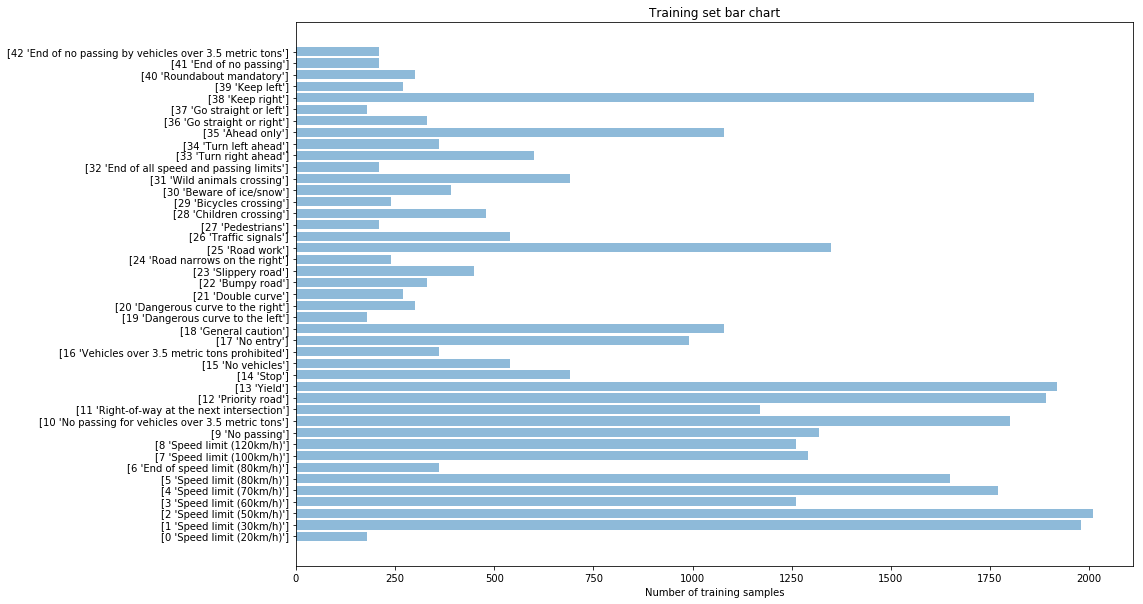

In [8]:
# plot counts for each class

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random

sign_names=pd.read_csv('signnames.csv', sep=',',header=0)

objects = sign_names.values
y_val = np.arange(len(objects))
count = np.bincount(y_train)
width = 0.8
fig = plt.figure(figsize=(15,10))

plt.barh(y_val, count, width,  align='center', alpha=0.5)
plt.yticks(y_val, objects)
plt.xlabel('Number of training samples')
plt.title('Training set bar chart')
plt.show()



In [11]:
import random

def skewedImage(img):
    tx = random.randint(-2,2)
    ty = random.randint(-2,2)
    scale = random.uniform(.9, 1.1)
    theta = random.uniform(-15,15)
    rows,cols,_ = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),theta,scale)
    img = cv2.warpAffine(img,M,(cols,rows))
    N = np.float32([[1,0,tx],[0,1,ty]])
    return cv2.warpAffine(img,N,(cols,rows))


In [12]:
# create data from existing data

DATASET_TIMES = 6

X_skewed = np.zeros( (len(X_train)*DATASET_TIMES,32,32,3), dtype='uint8' )

for i in range(len(X_train)):
    for j in range(DATASET_TIMES):
        X_skewed[i*DATASET_TIMES+j] = skewedImage(X_train[i])

X_train = np.concatenate((X_train, X_skewed))
y_train = np.concatenate((y_train, np.repeat(y_train, DATASET_TIMES)))
        

In [13]:

from sklearn.model_selection import train_test_split

r_state = np.random.randint(0, 100)

X_train, X_validation, y_train, y_validation = \
    train_test_split(X_train, y_train, test_size=0.25, random_state=r_state)

n_train = y_train.shape[0]
n_validation = y_validation.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)




Number of training examples = 182694
Number of validation examples = 60899


In [14]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def convert_to_grayscale(image_data):
    # takes in image_data in 3 channel RGB format and outputs single channel greyscale image data
    image_data = np.matmul(image_data, [ 0.299, 0.587,0.114])
    return image_data

def normalize(image_data): #takes image data in greyscale format and normalizes between 0.1 and 0.9
    image_data = np.add(0.1,image_data*.8/255)
    return image_data

In [15]:


X_train_gr = np.empty((n_train, 32, 32, 1))
for i in range(n_train):
    X_train_gr[i,:,:,0] = grayscale(X_train[i])
X_train = X_train_gr


X_validation_gr = np.empty((n_validation, 32, 32, 1))
for i in range(n_validation):
    X_validation_gr[i,:,:,0] = grayscale(X_validation[i])
X_validation = X_validation_gr

    
X_test_gr = np.empty((n_test, 32, 32, 1))
for i in range(n_test):
    X_test_gr[i,:,:,0] = grayscale(X_test[i])
X_test = X_test_gr



In [16]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

# shuffle the data
X_train, y_train = shuffle(X_train, y_train)


In [17]:
import tensorflow as tf

tf.reset_default_graph()



In [18]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.12
    
    # Modified LeNet network
    
    # for grayscale images
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Adding a brached out output of stage 1 to the output of stage 2
    # input from stage 2 = 10x10x16, input from stage 1 = 14x14x6
    fc0 = tf.concat([flatten(conv2), flatten(conv1)], 1)
    #fc0 = flatten(conv2)

    # Layer 3: 
    #fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1576, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


In [19]:
### x is a placeholder for a batch of input images. 
### y is a placeholder for a batch of output labels.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


In [20]:
### Train your model here.
### Feel free to use as many code cells as needed.

rate = 0.001
EPOCHS = 20
MAX_BATCH_SIZE = 128


variable_rate = tf.placeholder(tf.float32, shape=[])
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, MAX_BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+MAX_BATCH_SIZE], y_data[offset:offset+MAX_BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [22]:

va = np.array([])

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, MAX_BATCH_SIZE):
            end = offset + MAX_BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, variable_rate: rate})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        va = np.append(va, validation_accuracy)  
    
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.683
EPOCH 2 ...
Validation Accuracy = 0.832
EPOCH 3 ...
Validation Accuracy = 0.888
EPOCH 4 ...
Validation Accuracy = 0.912
EPOCH 5 ...
Validation Accuracy = 0.931
EPOCH 6 ...
Validation Accuracy = 0.937
EPOCH 7 ...
Validation Accuracy = 0.947
EPOCH 8 ...
Validation Accuracy = 0.952
EPOCH 9 ...
Validation Accuracy = 0.953
EPOCH 10 ...
Validation Accuracy = 0.941
EPOCH 11 ...
Validation Accuracy = 0.953
EPOCH 12 ...
Validation Accuracy = 0.963
EPOCH 13 ...
Validation Accuracy = 0.961
EPOCH 14 ...
Validation Accuracy = 0.958
EPOCH 15 ...
Validation Accuracy = 0.968
EPOCH 16 ...
Validation Accuracy = 0.969
EPOCH 17 ...
Validation Accuracy = 0.963
EPOCH 18 ...
Validation Accuracy = 0.961
EPOCH 19 ...
Validation Accuracy = 0.966
EPOCH 20 ...
Validation Accuracy = 0.964
Model saved


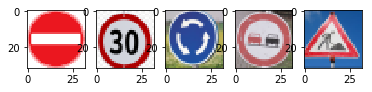

In [23]:
def resize_and_crop(image):
    if image.shape[1] < image.shape[0]:
        r = 32.0 / image.shape[1]
        dim = (32, int(image.shape[0] * r))
    else:
        r = 32.0 / image.shape[0]
        dim = (int(image.shape[1] * r), 32)
 
    # perform the actual resizing of the image and show it
    reimage = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    
    if reimage.shape[0] > 32:
        offset = (reimage.shape[0] - 32) // 2
        return reimage[offset:32+offset,0:32]
    else:
        offset = (reimage.shape[1] - 32) // 2
        return reimage[0:32, offset:32+offset]

# resize and crop raw images to 32x32 size
noentry = resize_and_crop(cv2.imread('noentry.png', cv2.IMREAD_COLOR))
plt.subplot(1,5,1)
plt.imshow(cv2.cvtColor(noentry, cv2.COLOR_BGR2RGB))

speedlimit30 = resize_and_crop(cv2.imread('speed-limit30.png', cv2.IMREAD_COLOR))
plt.subplot(1,5,2)
plt.imshow(cv2.cvtColor(speedlimit30, cv2.COLOR_BGR2RGB))

roundabout = resize_and_crop(cv2.imread('round-about.png', cv2.IMREAD_COLOR))
plt.subplot(1,5,3)
plt.imshow(cv2.cvtColor(roundabout, cv2.COLOR_BGR2RGB))

nopassing = resize_and_crop(cv2.imread('no-passing.png', cv2.IMREAD_COLOR))
plt.subplot(1,5,4)
plt.imshow(cv2.cvtColor(nopassing, cv2.COLOR_BGR2RGB))

roadwork = resize_and_crop(cv2.imread('road-work.png', cv2.IMREAD_COLOR))
plt.subplot(1,5,5)
plt.imshow(cv2.cvtColor(roadwork, cv2.COLOR_BGR2RGB))

#image2 = plt.imread('./road-work.jpg')
#image2 = convert_to_grayscale(image2)
#image2 = normalize(image2)
#resized_image2 = cv2.resize(image2, (32, 32)) 
#resized_image2 = resized_image2.reshape([32,32,1])

img_list=[noentry, speedlimit30, roundabout, nopassing, roadwork]


In [24]:
X_verify = np.array(img_list)
y_verify = np.array([17, 1, 40, 9, 25])

In [25]:
# convert to grayscale
X_verify_gr = np.empty((5, 32, 32, 1))
for i in range(5):
    X_verify_gr[i,:,:,0] = grayscale(X_verify[i])

X_verify = X_verify_gr
    

In [26]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    tf.train.Saver().restore(sess, './lenet')
    validation_accuracy = evaluate(X_verify, y_verify)

    print("Validation Accuracy = {:.3f}".format(validation_accuracy))


Validation Accuracy = 1.000


In [27]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

import csv

# parse the signal names list and store for later
with open('signnames.csv') as csvfile:
    sign_names_csv = csv.reader(csvfile, delimiter=',')
    sign_names={}
    for row in sign_names_csv:
        sign_names[row[0]] = row[1]

top_predictions = tf.nn.top_k(tf.nn.softmax(logits), k=3)

with tf.Session() as sess:
    tf.train.Saver().restore(sess, './lenet')
    prob, ind = sess.run(top_predictions, feed_dict={x: X_verify, y: y_verify})
    
print("{:5} | {:20} | {:20} | {:20} | {:20}".format("N ex","Target","1st choice","2nd choice","3rd choice"))
print("--------------------------------------------------------------------------------------------------")
for i in range(5):
    print("{:5} | {:20} | {:20} | {:20} | {:20}".format(u_counts[y_verify[i]], sign_names[str(y_verify[i])], sign_names[str(ind[i,0])], sign_names[str(ind[i,1])],sign_names[str(ind[i,2])]))      
    #print("{:5} | {:20} | {:20} | {:20} | {:20}".format(u_counts[y_verify[i]], sign_names[str(y_verify[i])], sign_names[str(ind[i,0])], sign_names[str(ind[i,1])],sign_names[str(ind[i,2])]))      

print("\n\n")
print("{:5} | {:20} | {:20}".format("", "Target", "1st choice prob %"))
print("------------------------------------------------------------------")
for i in range(5):
    print("{:5} | {:20} | {:20.2}".format("", sign_names[str(y_verify[i])], prob[i,0]))


N ex  | Target               | 1st choice           | 2nd choice           | 3rd choice          
--------------------------------------------------------------------------------------------------
  990 | No entry             | No entry             | End of all speed and passing limits | Speed limit (20km/h)
 1980 | Speed limit (30km/h) | Speed limit (30km/h) | Speed limit (50km/h) | Go straight or left 
  300 | Roundabout mandatory | Roundabout mandatory | Priority road        | Speed limit (30km/h)
 1320 | No passing           | No passing           | Speed limit (20km/h) | Speed limit (30km/h)
 1350 | Road work            | Road work            | Bumpy road           | Children crossing   



      | Target               | 1st choice prob %   
------------------------------------------------------------------
      | No entry             |                  1.0
      | Speed limit (30km/h) |                  1.0
      | Roundabout mandatory |                  1.0
      | No passing  

In [29]:
with tf.Session() as sess:
    tf.train.Saver().restore(sess, './lenet')
    accuracy = evaluate(X_test, y_test)

    print("Test set accuracy = {:.3f}".format(accuracy))


Test set accuracy = 0.926


In [ ]:
Test set accuracy is around 92.6% but lower than the validation set accuracy of 96.4%